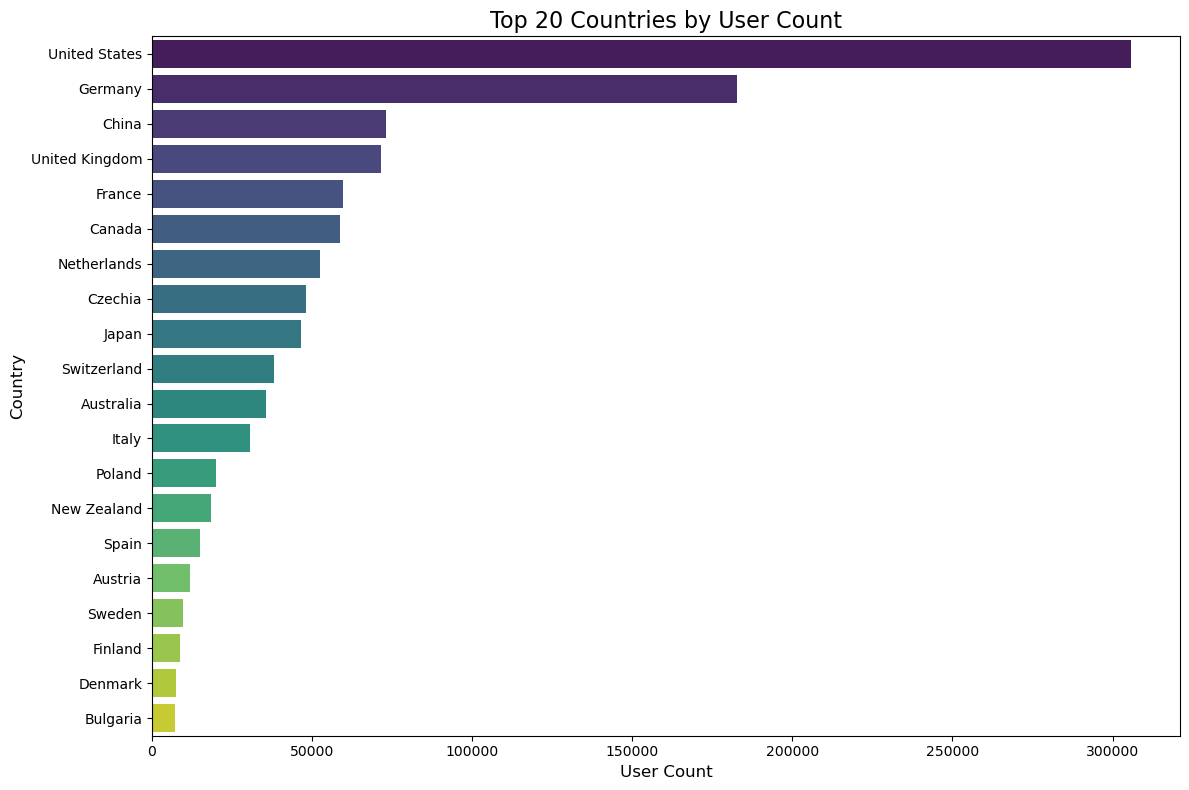

country
United States     305788
Germany           182659
China              73011
United Kingdom     71606
France             59570
Canada             58600
Netherlands        52367
Czechia            48122
Japan              46553
Switzerland        38093
Australia          35746
Italy              30671
Poland             20002
New Zealand        18444
Spain              14939
Austria            11758
Sweden              9851
Finland             8815
Denmark             7412
Bulgaria            7357
Name: count, dtype: int64

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
data = pd.read_csv('users_combined_info_500.csv')

# 国家分布统计
country_distribution = data['country'].value_counts().dropna()

# 可视化：国家用户分布
plt.figure(figsize=(12, 8))
top_countries = country_distribution.head(20)  # 取前20个国家
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title('Top 20 Countries by User Count', fontsize=16)
plt.xlabel('User Count', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

# 保存国家分布统计结果
country_distribution.head(20)


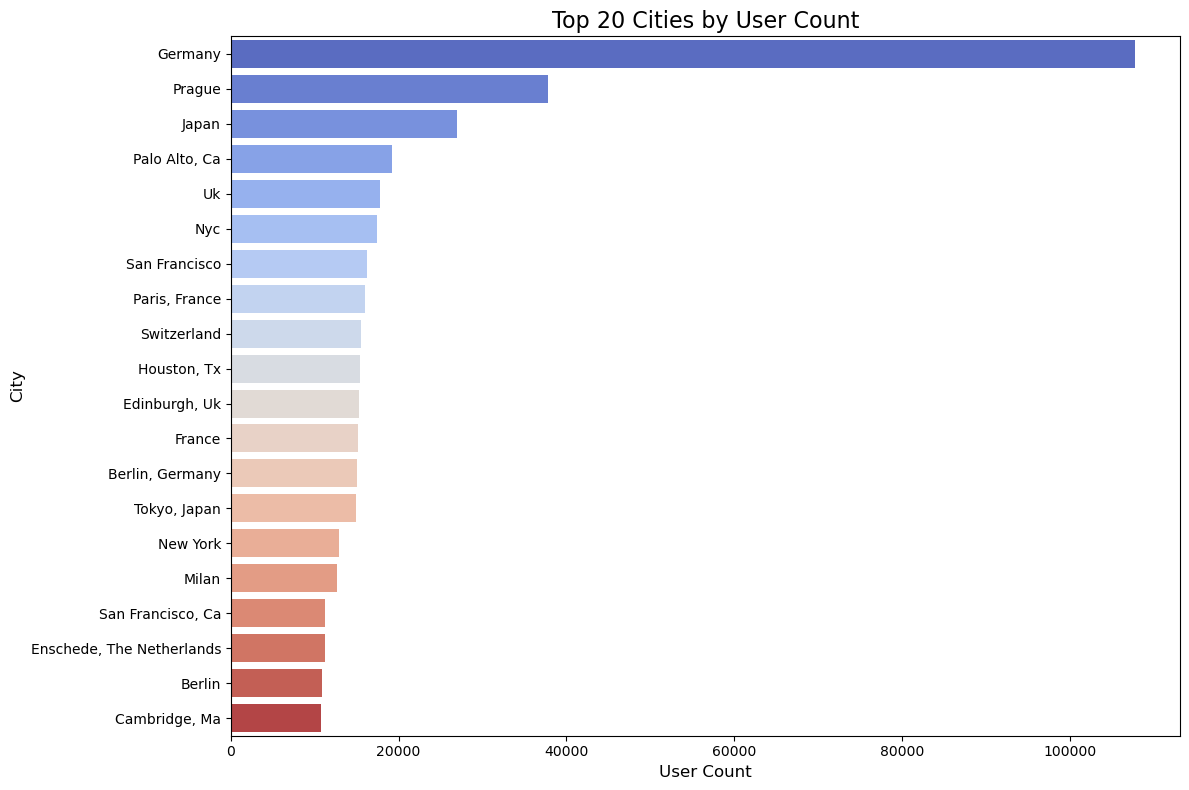

location_cleaned
Germany                      107747
Prague                        37757
Japan                         26986
Palo Alto, Ca                 19215
Uk                            17789
Nyc                           17452
San Francisco                 16271
Paris, France                 16021
Switzerland                   15555
Houston, Tx                   15449
Edinburgh, Uk                 15308
France                        15128
Berlin, Germany               15095
Tokyo, Japan                  14877
New York                      12893
Milan                         12704
San Francisco, Ca             11271
Enschede, The Netherlands     11218
Berlin                        10883
Cambridge, Ma                 10740
Name: count, dtype: int64

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
data = pd.read_csv('users_combined_info_500.csv')

# 对 location 字段清洗
# 去除空值、统一大小写、移除多余空格
data['location_cleaned'] = data['location'].fillna('Unknown').str.strip().str.title()

# 统计城市分布
city_distribution = data['location_cleaned'].value_counts()

# 可视化：主要城市分布
top_cities = city_distribution.head(20)  # 取前20个城市
plt.figure(figsize=(12, 8))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="coolwarm")
plt.title('Top 20 Cities by User Count', fontsize=16)
plt.xlabel('User Count', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()
plt.show()

# 保存城市分布统计结果
city_distribution.head(20)


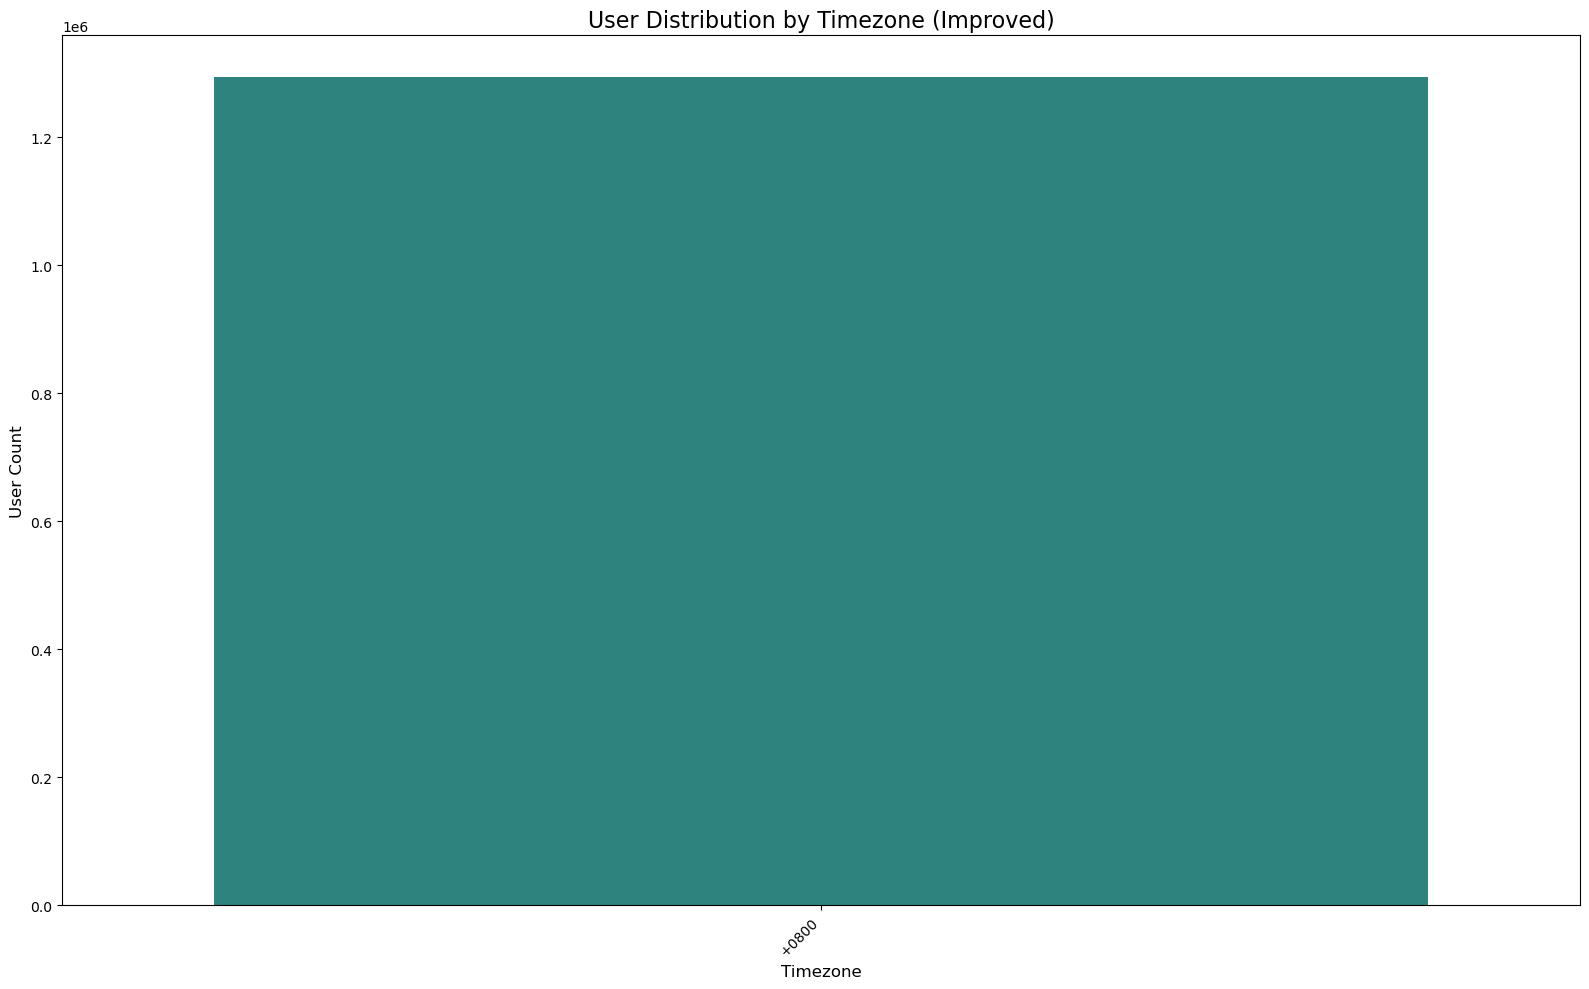

timezone
+0800    1294776
Name: count, dtype: int64

In [19]:
from datetime import datetime

# 提取时区信息
data['event_time_parsed'] = pd.to_datetime(data['event_time'], errors='coerce')
data['timezone'] = data['event_time_parsed'].dt.strftime('%z')

# 统计时区分布
timezone_distribution = data['timezone'].value_counts()
# 合并小众时区为 "Other"
threshold = 100  # 低于 100 的分布合并为其他
timezone_distribution['Other'] = timezone_distribution[timezone_distribution < threshold].sum()
timezone_distribution = timezone_distribution[timezone_distribution >= threshold]
# 可视化：时区用户分布
timezone_distribution_sorted = timezone_distribution.sort_index()  # 按时区值排序
plt.figure(figsize=(16, 10))
sns.barplot(
    x=timezone_distribution_sorted.index,
    y=timezone_distribution_sorted.values,
    palette="viridis"
)
plt.title('User Distribution by Timezone (Improved)', fontsize=16)
plt.xlabel('Timezone', fontsize=12)
plt.ylabel('User Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # 调整刻度旋转角度和位置
plt.tight_layout()
plt.show()


# 保存时区分布统计结果
timezone_distribution.head(10)


d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


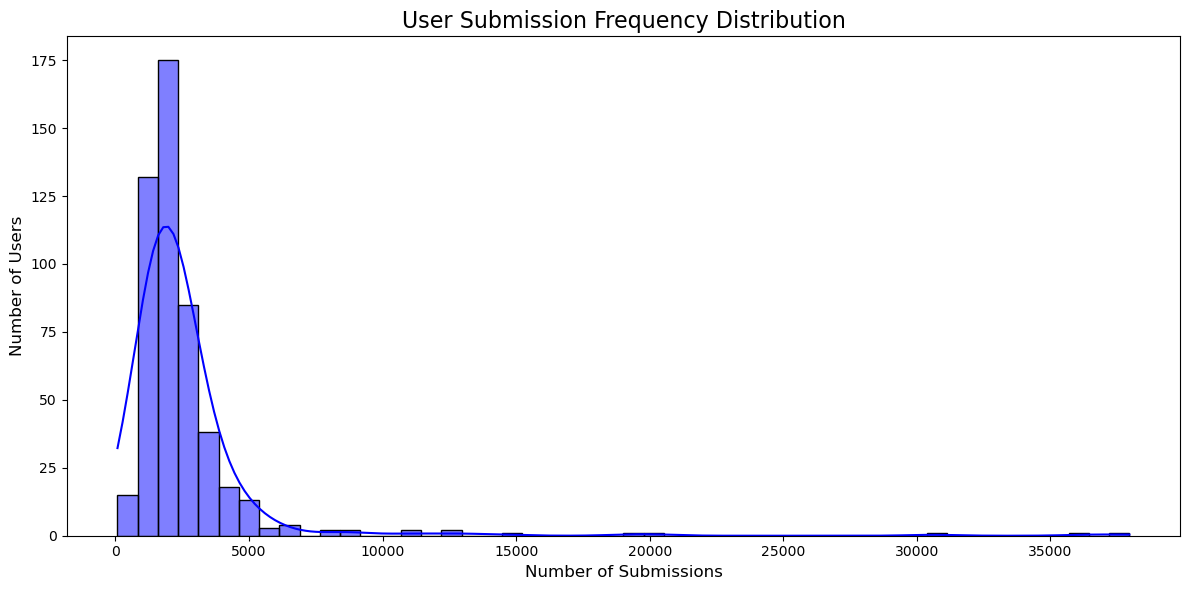

High active users: 25
Low active users: 39


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
data = pd.read_csv('users_combined_info_500.csv')

# 1. 提交频率分析
# 统计每个用户的提交次数
user_submission_counts = data['user_id'].value_counts()

# 可视化：高活跃用户分布
plt.figure(figsize=(12, 6))
sns.histplot(user_submission_counts, bins=50, kde=True, color='blue')
plt.title('User Submission Frequency Distribution', fontsize=16)
plt.xlabel('Number of Submissions', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.tight_layout()
plt.show()

# 高活跃和低活跃用户
high_active_users = user_submission_counts[user_submission_counts > 5000]  # 提交次数超过5000
low_active_users = user_submission_counts[user_submission_counts <= 1000]  # 提交次数少于等于1000

print(f"High active users: {len(high_active_users)}")
print(f"Low active users: {len(low_active_users)}")





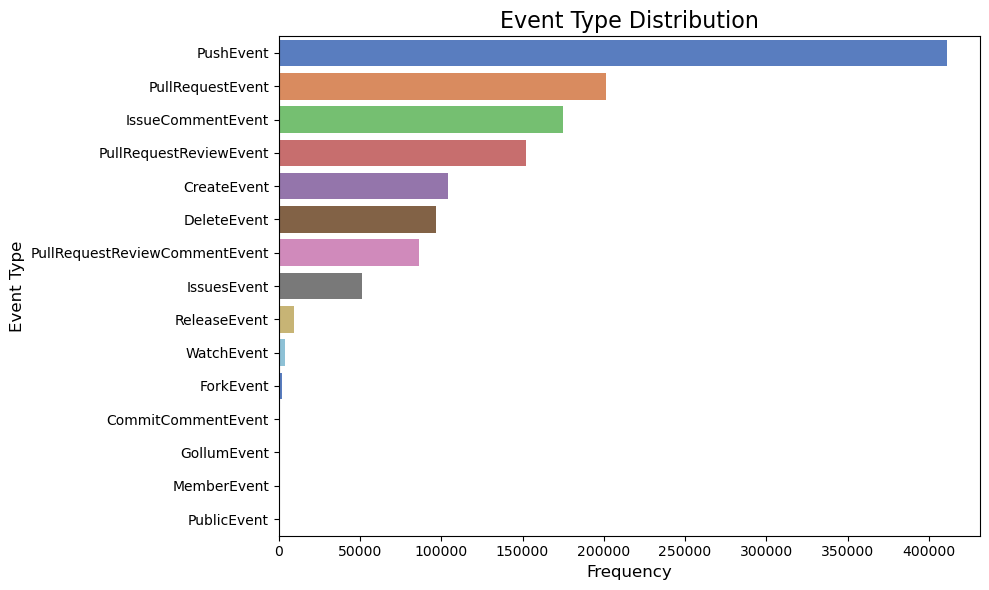

In [15]:
# 2. 事件类型分布
event_type_distribution = data['event_type'].value_counts()

# 可视化：事件类型分布
plt.figure(figsize=(10, 6))
sns.barplot(x=event_type_distribution.values, y=event_type_distribution.index, palette="muted")
plt.title('Event Type Distribution', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Event Type', fontsize=12)
plt.tight_layout()
plt.show()

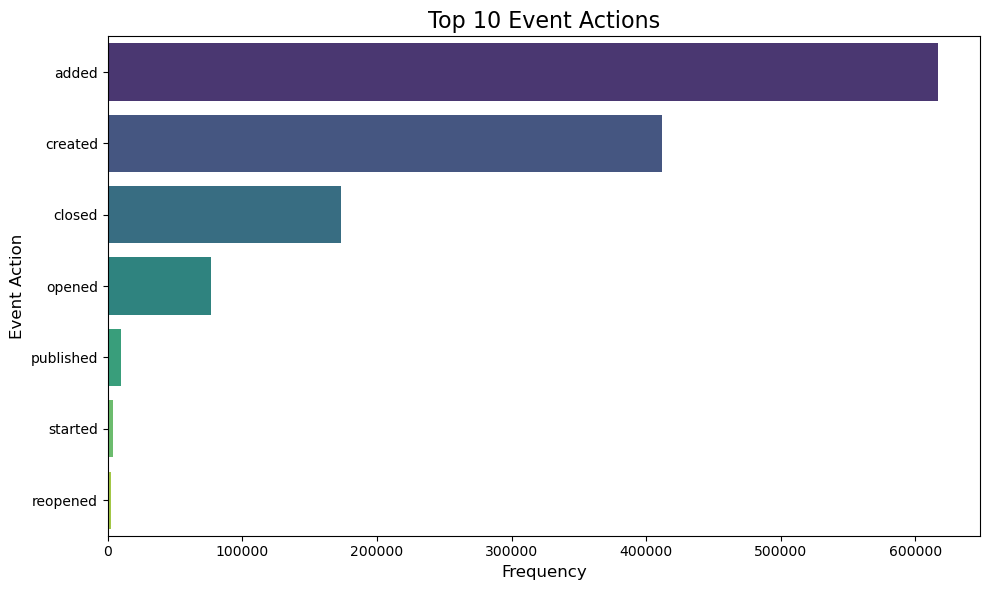

In [16]:
# 3. 操作行为分布
event_action_distribution = data['event_action'].value_counts()

# 可视化：操作行为分布
plt.figure(figsize=(10, 6))
sns.barplot(x=event_action_distribution.values[:10], y=event_action_distribution.index[:10], palette="viridis")
plt.title('Top 10 Event Actions', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Event Action', fontsize=12)
plt.tight_layout()
plt.show()

In [17]:
# 打印结果摘要
print("Event Type Distribution:\n", event_type_distribution.head(10))
print("Event Action Distribution:\n", event_action_distribution.head(10))

Event Type Distribution:
 event_type
PushEvent                        410955
PullRequestEvent                 201128
IssueCommentEvent                174806
PullRequestReviewEvent           151843
CreateEvent                      104371
DeleteEvent                       96999
PullRequestReviewCommentEvent     86198
IssuesEvent                       51205
ReleaseEvent                       9455
WatchEvent                         3809
Name: count, dtype: int64
Event Action Distribution:
 event_action
added        617218
created      411961
closed       173489
opened        76406
published      9455
started        3809
reopened       2438
Name: count, dtype: int64
